# Homework 4 - ADM - Group #21

## [1] Hashing task!

In [1]:
#Importing libraries used in the .py files
import time
from bitarray import bitarray
import numpy as np

#Importing the hashing_lib.py
import hashing_lib

In [2]:
#Importing the passwords
with open("passwords1.txt") as file:
    passwords1 = file.readlines()
with open("passwords2.txt") as file:
    passwords2 = file.readlines()

### *Looking for the parameters of our Bloom Filter*

We can approach the computing of the different parameters of our Bloom Filter in different ways. One of them is to previously define the probability of false positives that we want to have and then look for the other parameters.

So, if we want to have a **probability of 0.0005 to find a false positive, we can discover the **number of hash functions** needed in order to have this result. We can use the ***number_hash_functions function*** in the hashing_lib.py file.

In [3]:
print('Number of hash functions: ', hashing_lib.number_hash_functions(0.0005))

Number of hash functions:  11


So we have to define **11 hash functions** in order to have a probability of 0.0005 to find a false positive.

A faster approach is to use just **'one' core hash function** and then calculate *11 hash values* by implementing small changes to the core hash function. In this way the Bloom Filter will be surely faster, but the number of false positives will increase at the same time. 

The hash function for what we opted is a ***module hash function*** that takes the sum as strings of the **Unicode code points** of each Unicode character of the password (using the *ord()* method) for what we are computing the hash values multiplicated for their positions inside the word. Then it calculates the **module** of this value (or some variants of this value) with two different functions:
    1. For the first one we consider the length of the Bloom Filter as divisor;
    2. For the second one we consider the floor of the squared root of the length of the Bloom Filter as divisor.

Then we have to check the **number of passwords** that we have to insert inside our Bloom Filter.

In [4]:
print('Number of passwords: ', len(passwords1))

Number of passwords:  100000000


Knowing the number of passwords that we have to insert inside our Bloom Filter, we can find out the **number of bits** of our Bloom Filter. 

For this purpose we can just use the ***number_bits function*** in the hashing_lib.py file.

In [5]:
print('Number of bits: ', hashing_lib.number_bits(100000000, 0.0005))

Number of bits:  1582028261


Since we are working with a *module hash function*, it's better to set the number of bits to a **prime number**. The nearest prime number to 1582028261 is 1582028303, so we can set the number of bits of our Bloom Filter to **1582028303**.

So, now we know all the parameters for our Bloom Filter:
    1. Number of hash functions (k) = 11
    2. Number of bits (m) = 1582028303
    3. Number of elements in the Bloom Filter (n) = 100000000
    4. Probability of false positives (p) = 0.0005 (0.05%)

### *Quick look at the hash values*

We can just take a quick look to the hash values computed by the hash functions. 

In [7]:
hashing_values = hashing_lib.hash_functions(bitarray(1582028303), 'AABB')
for value in hashing_values:
    print(value, end = ' ')

267037841 924533072 17310 1009065843 534075682 28038 255206 34620 29466 16562 34458 

In [8]:
hashing_values = hashing_lib.hash_functions(bitarray(1582028303), 'ABBA')
for value in hashing_values:
    print(value, end = ' ')

269037837 925533070 22958 147650213 538075674 9232 255210 6142 12284 16566 18412 

We can see that they are **not sensitive to the order of the letters**, so we can avoid that words with a different order of letters will give us equal hash values. 

### *Bloom Filter*

Now we can run our Bloom Filter and find out how many passwords in passwords2 already exist in password1.

In [9]:
hashing_lib.Bloom_Filter(passwords1, passwords2)

Number of hash functions used:  11
Number of duplicates detected:  14460140
Probability of false positives:  0.0005
Execution time:  3908.6366868019104


So, we have detected **14.460.140** possible passwords in passwords2 that are already in passwords1, but we are pretty sure that some of them are false positives.

The **execution time** of the Bloom Filter that we've used is 3908/60 = 65.10, so it's **65 minutes** (one hour circa).

## [2] Alphabetical Sort

In [1]:
#Importing the sorting_lib.py
import sorting_lib

### *Basic Counting Sort*

First of all, we implement the basic Counting Sort algorithm.

In [2]:
numbers = [3, 4, 5, 6, 10, 1, 4, 2, 3]
sorting_lib.Counting_Sort(numbers)

[1, 2, 3, 3, 4, 4, 5, 6, 10]

### *Letters Counting Sort*

Then we apply small changes at the same implementation of the Counting Sort algorithm in order to sort all the 26 lowercase letters of ISO basic Latin alphabet.

In [3]:
letters = ['p', 'q', 'z', 'a', 'f', 'c', 'r', 'h', 'k', 's', 'd', 'e', 'o', 'j', 'y', 'i', 'u', 'w', 'g', 'b', 
           'v', 't', 'x', 'l', 'm', 'n']
ordered_letters = sorting_lib.Letters_Sort(letters)
for letter in ordered_letters:
    print(letter, end = ' ')

a b c d e f g h i j k l m n o p q r s t u v w x y z 

The time complexity of Letters_Sort function is linear and as the the letters to be sorted (n) are equal to the possible values that can be sorted (k), the time complexity of the algorithm in terms of **Big O notation** is **O(n)**. If k is  greater than n the time complexity will be **O(n + k)**.

### *Words Counting Sort*

Then we implement small changes at the Counting Sort algorithm in order to sort words in alphabetical order.

In [4]:
words = ['oakley river', 'oak', 'oak ridge', 'oak hill', 'oakley park']
sorting_lib.Words_Sort(words)

['oak', 'oak hill', 'oak ridge', 'oakley park', 'oakley river']

In this case the time complexity of the Words_Sort function is bigger than a linear time complexity, it is of the order **O(n^2)**.

## [3] Find similar wines!

In [1]:
#Importing libraries
import pandas as pd
import csv
import numpy as np
from numpy import linalg 
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Importing the clustering_lib.py
import clustering_lib

### *The Data*

By looking at the wine.name file we can see that the names of the various columns in the wine.data file are:

    1. Alcohol
    2. Malic acid
    3. Ash
    4. Alcalinity of ash  
    5. Magnesium
    6. Total phenols
    7. Flavanoids
    8. Nonflavanoid phenols
    9. Proanthocyanins
    10. Color intensity
    11. Hue
    12. OD280/OD315 of diluted wines
    13. Proline  

So we will import the file as a pandas dataframe and we will call all the columns with their own proper name.

In [2]:
wines = pd.read_csv('wine.data', names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
                    'Hue', 'OD280/OD315 of diluted wines', 'Proline'], sep = ',')

### *Rescaling the data*

Before going to the core of the clustering analysis could be good to rescale all the variables, in order to have variables that have the same influence while we performing our analysis.

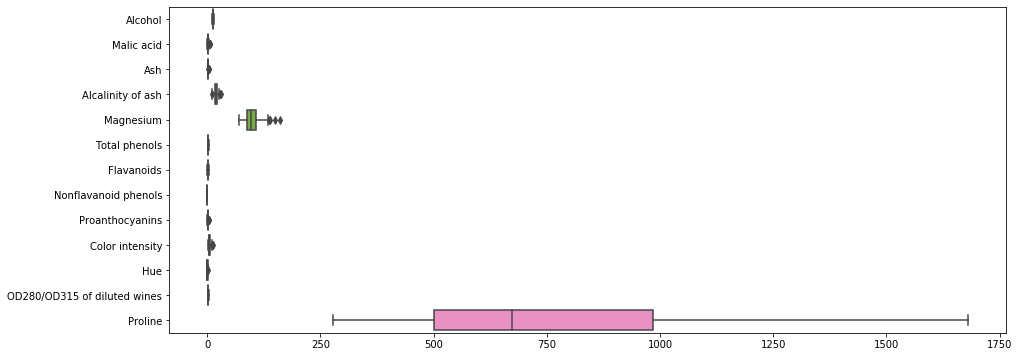

In [3]:
#Plotting the variables boxplots
plt.figure(figsize = (15,6))
sns.boxplot(data = wines, orient = "h")
plt.show()

As we can see, all the variables have a range of values too much different between each other. In particular the **Proline** and the **Magnesium** variables have greater values than the other variables.

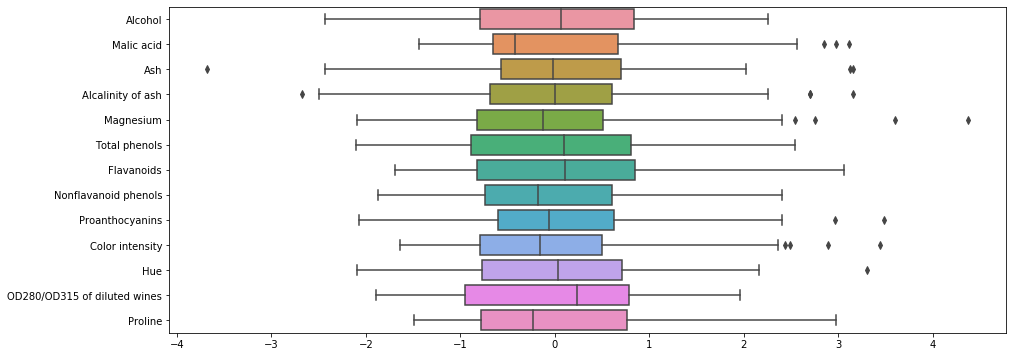

In [4]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(wines) #rescaling the data
scaled_wines = pd.DataFrame(scaled_array, columns = wines.columns) #creating a new dataframe with the rescaled values
#Plotting the rescaled variables boxplots
plt.figure(figsize = (15,6))
sns.boxplot(data = scaled_wines, orient = "h")
plt.show()

Now they seem to have more similar range of values, so the influence of each variable on the K-means analysis will be pretty similar to the influence of the other variables.

### ***Elbow Method***

In order to know the optimal number of clusters we can implement the **Elbow Method**, which show the trend of the **WCSS** while the number of clusters increase. In particular, we want to see the trend of the *WCSS* in a clusters **range of 1 to 10**.

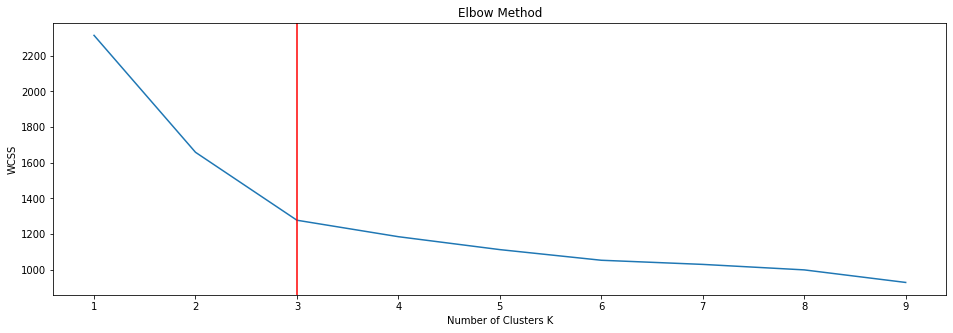

In [5]:
clustering_lib.elbow_method(list(range(1, 10)), scaled_wines)

Using the Elbow Method we can see that the WCSS decreases a lot between the number of clusters K = 1 and K = 3, for number of clusters greater than K = 3 the WCSS doesn't decrease very much, so we can say that the **optimal** number of clusters is ***K = 3***.

### *K - Means  Clustering Analysis*

Now we can perform the **K - Means clustering analysis** on our dataset choosing **3** as number of clusters.
After that we will add a new column in "wines" dataset that shows the cluster to which each wine belongs.

In [6]:
cluster, centr, clust = clustering_lib.K_Means(3, scaled_wines)
wines['Cluster'] = ['Cluster {}'.format(i) for i in cluster] #adding the cluster column to the dataset
wines.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cluster
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Cluster 3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Cluster 3
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Cluster 3
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Cluster 3
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Cluster 3


### *PCA Analysis*

To be sure that the K-Means Clustering went well we have can perform a **PCA Analysis**, in order to have just two variables that we can show on a two-dimensional plot.

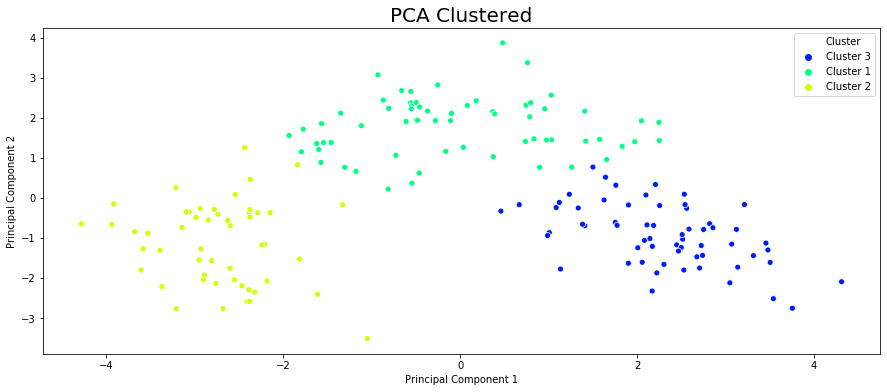

In [7]:
pca = PCA(n_components = 2) #specifing the number of components
pcaComponents = pca.fit_transform(scaled_wines) #computing the principal component analysis
#stroing them in a DataFrame
PCA_wines = pd.DataFrame(data = pcaComponents, columns = ['Principal Component 1', 'Principal Component 2']) 
PCA_wines['Cluster'] = ['Cluster {}'.format(i) for i in cluster] #Adding the cluster column
#Plotting the PCA 
fig = plt.figure(figsize = (15, 6))
plt.title('PCA Clustered', fontsize = 20)
sns.scatterplot(x = 'Principal Component 1', y = 'Principal Component 2', data = PCA_wines, 
                hue = 'Cluster', palette = "gist_rainbow_r")

From what we can see the data are pretty well clustered in **three different and distinguable Clusters**, even if there are some points that from a certain point of view can be considered belonging to a certain Cluster and not to another one. This result strongly depends on the **random choice of the centroids**.

### *Scatterplots of various combination of the features*

Now we can plot the **scatterplots** for each pair of features, which also shows very well how our data are grouped between the various clusters.

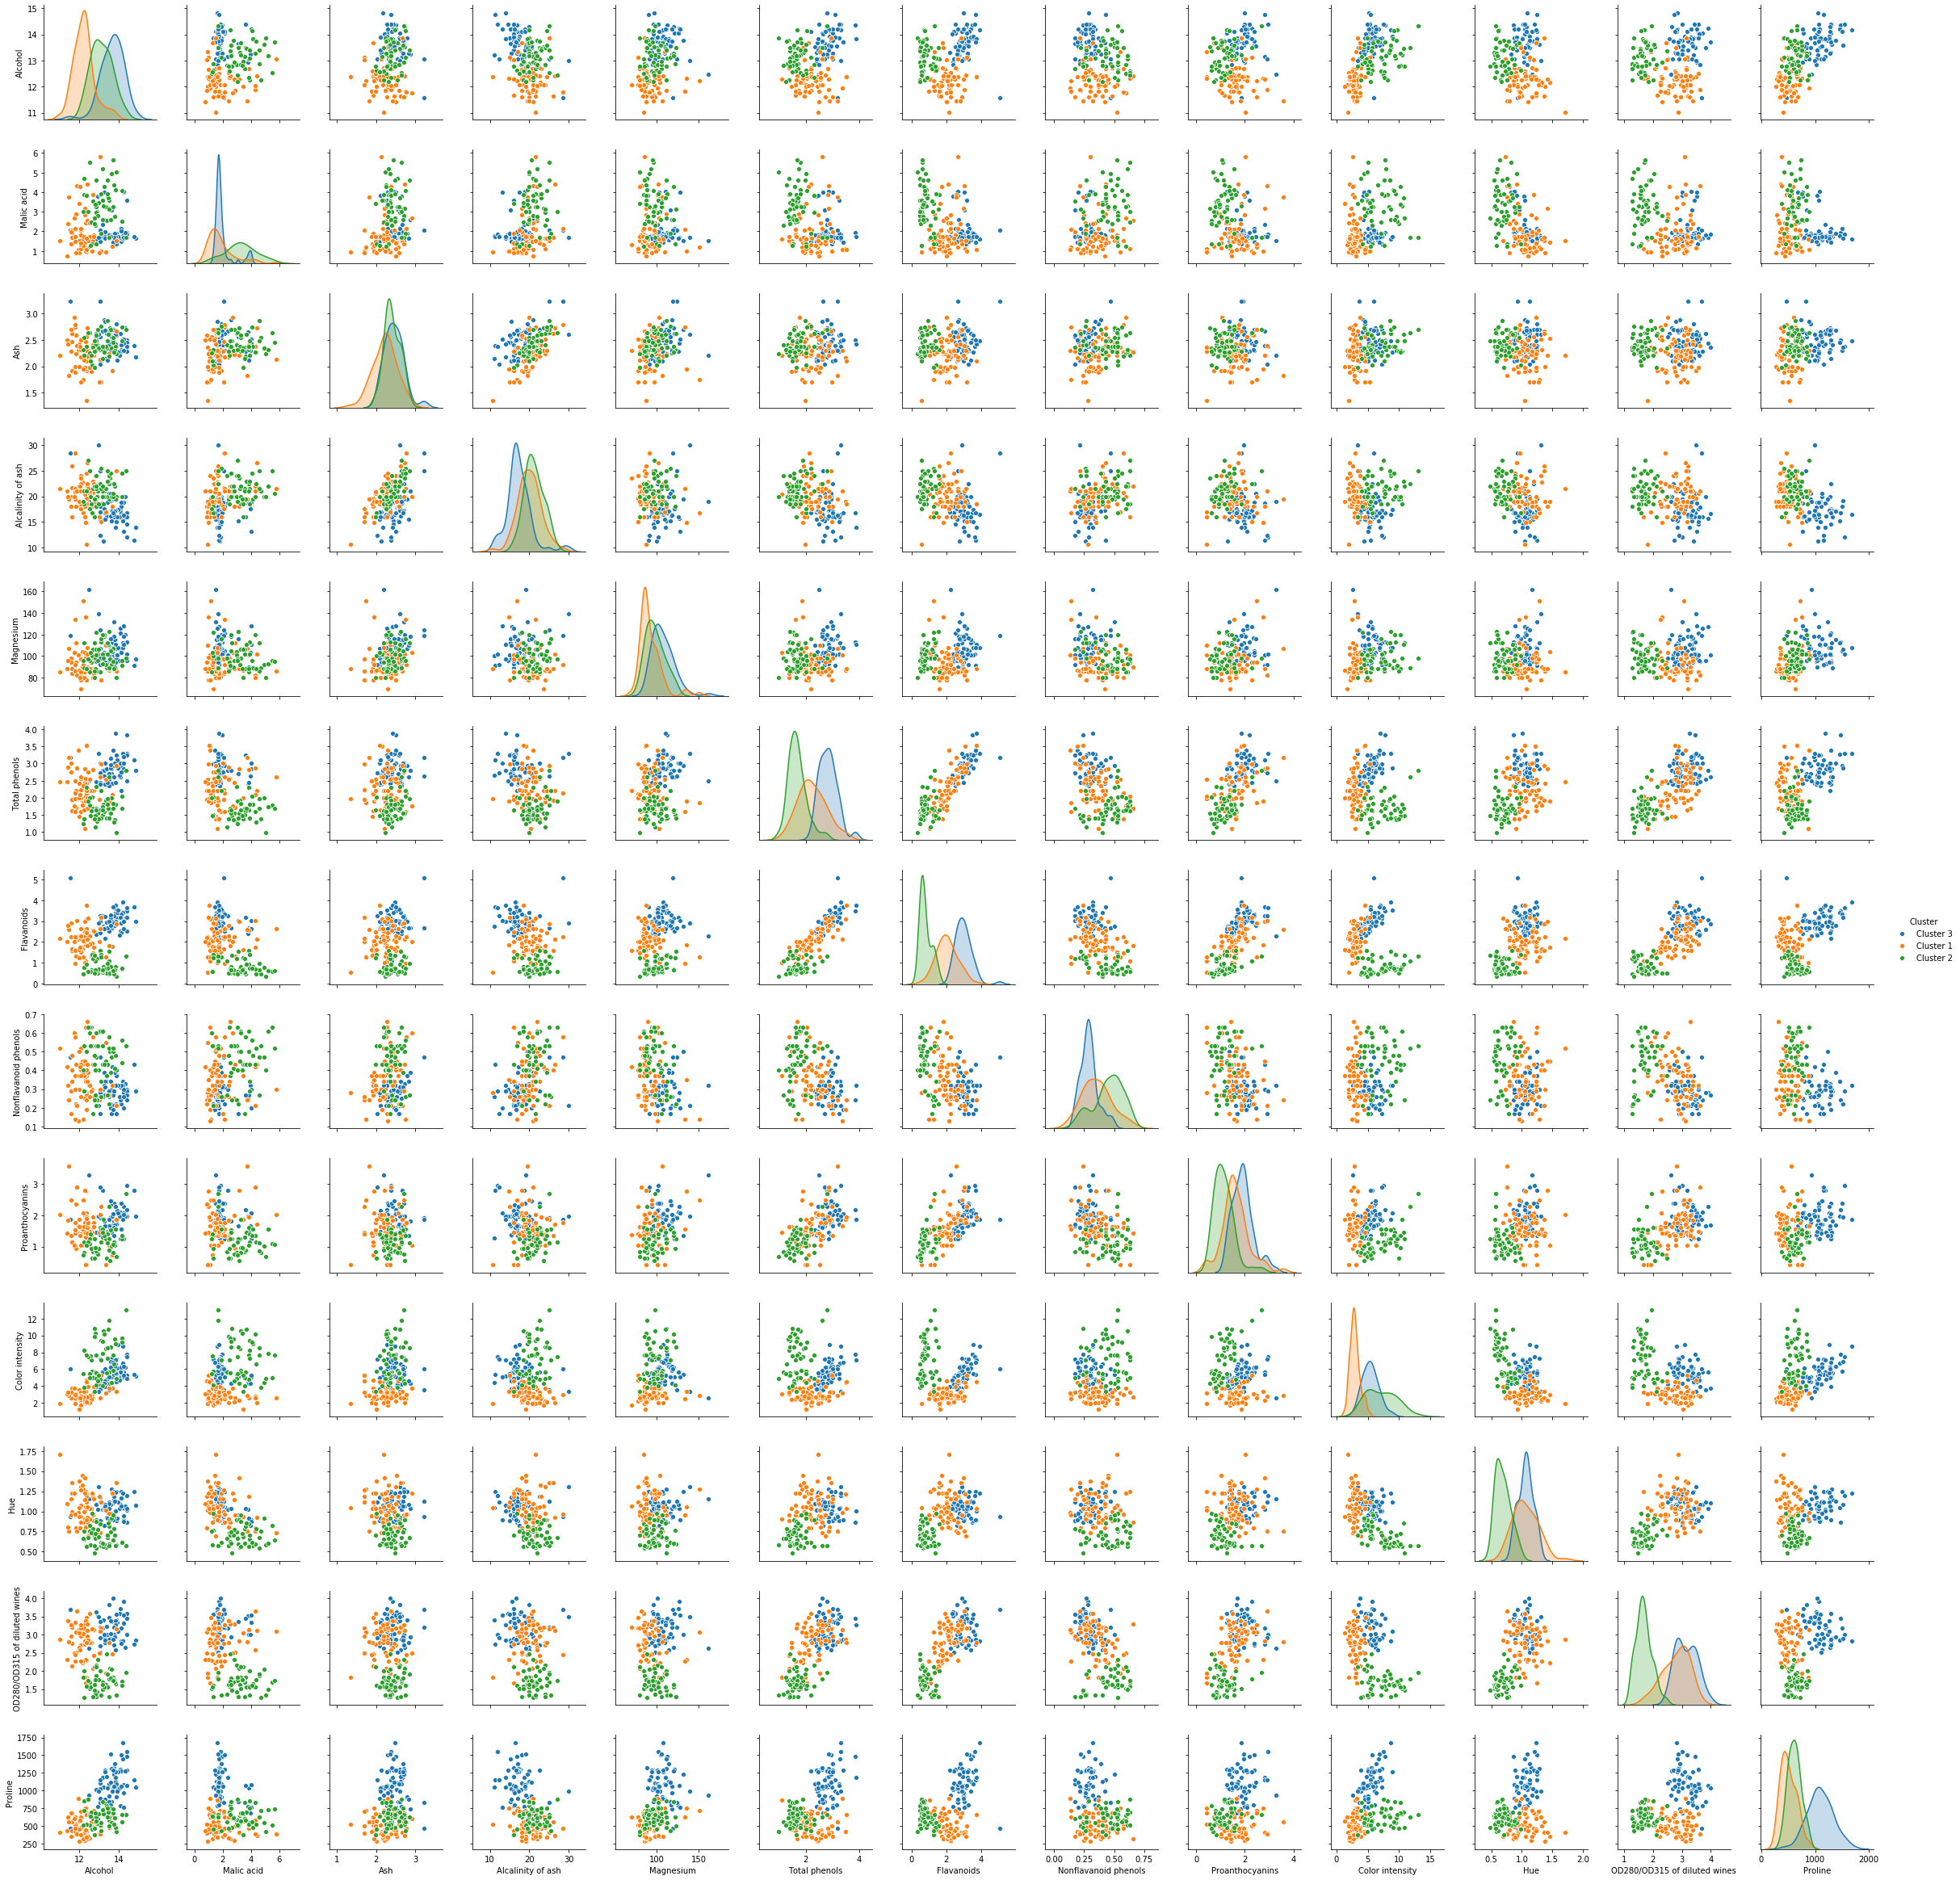

In [8]:
sns.pairplot(wines, hue = 'Cluster')

From what we can see the **'Alcohol'**, **'Flavanoids'**, **'Color intensity'**, **'OD280/OD315 of diluted wines'** and the **'Proline'** are the features which more defines the Cluster Analysis, indeed the Clusters are more recognizable when one of these features is involved in the analysis.

In particular **Cluster 3** seems mostly defined by **higher values** of these features while **Cluster 2** by **lower values** of these features.

## [4] K - Means can go wrong!

In [9]:
#Importing the theoretical_lib.py
import theoretical_lib

K - Means algorithm is an easy and fast Clustering Algorithm, but sometimes it can go wrong. 

But when does this happen? 

Most of the times when the iniziatilizations behind the algorithm are not done in the "right way". We can look at at this case and try to understand what could happen.

To do so we will look to a *bi-dimensional variables* as they are more simple to show. We will use the wines dataset and take the **'Alcohol'** and the **'OD280/OD315 of diluted wines'** columns and then we will perform all our analysis on them.

In [10]:
#Recreating the datasets with only two variables
data = wines[['Alcohol', 'OD280/OD315 of diluted wines']]
data_scaled = scaled_wines[['Alcohol', 'OD280/OD315 of diluted wines']]

### *The Centroids picked at the beginning are equal to each other.*

If all the centroids picked randomly in the beginning of the algorithm ***are the same*** we could have a big problem.

To show this case we can rewrite the K_Means function and inizialitizing the centroids with the same values and shape as we did in the ***K_Means_centr*** function inside the theoretical_lib.py file.

C:\Users\marco\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\marco\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


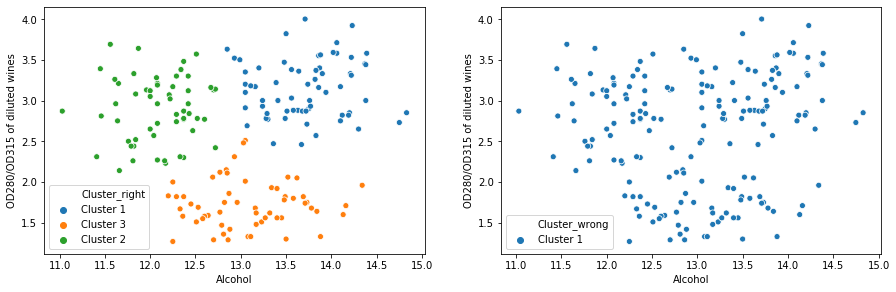

In [11]:
cluster_1, centr_1, clust_1 = clustering_lib.K_Means(3, data_scaled)
cluster_2, centr_2, clust_2 = theoretical_lib.K_Means_centr(3, data_scaled)
string_cluster1 = ['Cluster {}'.format(i) for i in cluster_1] 
string_cluster2 = ['Cluster {}'.format(i) for i in cluster_2] 
data.insert(2, 'Cluster_right', string_cluster1)   #Inserting the right cluster
data.insert(3, 'Cluster_wrong', string_cluster2)   #Inserting the 'wrong' cluster
#Plotting both clusters
plt.figure(figsize = (15, 10))
plt.subplot(221)
sns.scatterplot(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', data = data, hue = 'Cluster_right')
plt.subplot(222)
sns.scatterplot(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', data = data, hue = 'Cluster_wrong')
plt.show()

If all the centroids picked randomly at the beginning are equals to each other we willl have, in the end, just a **Single Cluster** where all the data are grouped, even if we've specified that the number of clusters is 3. 

A similar result can be obtained even if not all the centroids are equal to each other, but *just some of them are*.

### *The Centroids picked at the beginning are 'far' from the data.*

Another problem could be if at the beginning of the algorithm we have some centroids which are **far** from the data.

To show this case we can rewrite, another time, the K_Means function and inizialitizing one of the centroids with a far value as we did in the ***K_Means_far*** function inside del theoretical_lib.py file.

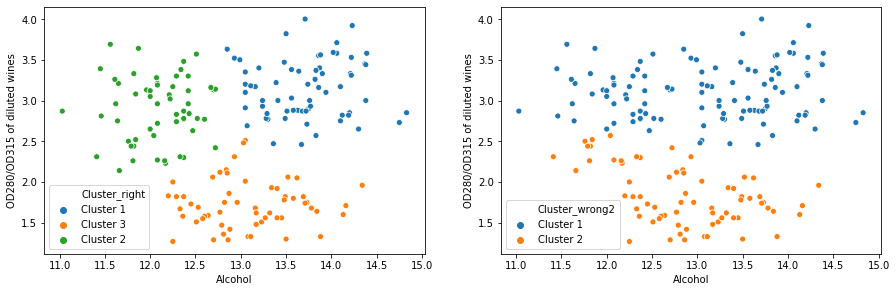

In [12]:
cluster_3, centr_3, clust_3 = theoretical_lib.K_Means_far(3, data_scaled)
string_cluster3 = ['Cluster {}'.format(i) for i in cluster_3]
data.insert(4, 'Cluster_wrong2', string_cluster3) #Inserting the second 'wrong' cluster
#Plotting the right and the wrong clusters
plt.figure(figsize = (15, 10))
plt.subplot(221)
sns.scatterplot(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', data = data, hue = 'Cluster_right')
plt.subplot(222)
sns.scatterplot(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', data = data, hue = 'Cluster_wrong2')
plt.show()

If one of the Centroids is very far from the data (which is possible if there is an evident **outlier** in the data we have) we are going to have a scenario where this 'far' centroid will be **stuck in a certain point** (in the case we have an outlier we are going to have a cluster which will consist of just the outlier point).

In the case that we've just showed the points are clustered in just **Two Clusters** even if we've specified that the number of clusters is 3.

### *Resuming*

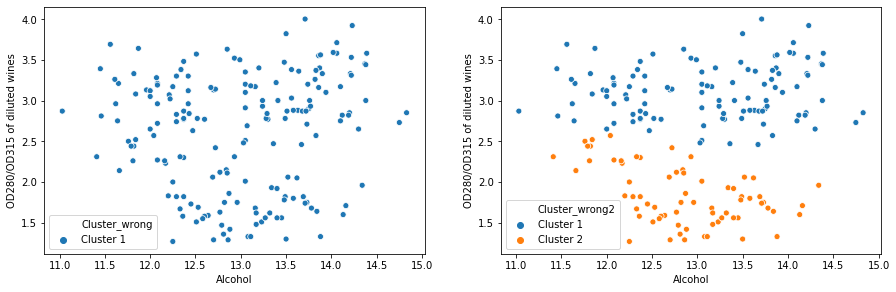

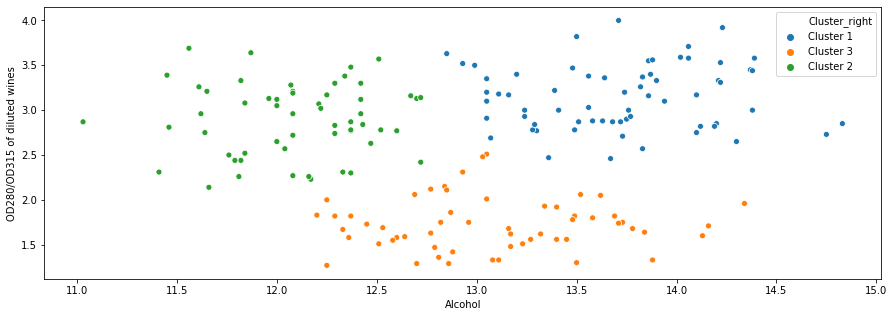

In [13]:
#Showing another time all the scatterplots
plt.figure(figsize = (15, 10))
plt.subplot(221)
sns.scatterplot(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', data = data, hue = 'Cluster_wrong')
plt.subplot(222)
sns.scatterplot(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', data = data, hue = 'Cluster_wrong2')
plt.show()
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', data = data, hue = 'Cluster_right')
plt.show()

So we have proven that the initialization is a critical step in a K-Means Algorithm, because the values that the centroids assume are really important in order to have distinguable and defined Clusters.

We can also talk about wrong initialization of a K-Means algorithm in terms of cost. Normally the cost of a cluster algorithm is **(sigma ^ 2)n** where sigma is the radius of the clusters. In the case one of the Centroid is randomly picked in a point perfectly in the middle of two clusters, the cost of the algorithm will be of the order **Omega((B ^ 2) * n)**, where B represents the distance between the Clusters. So, more the Clusters are far from each other, more the the cost of algorithm will increase. 